In [1]:
# Importing the necesary libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Flood.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [5]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [6]:
df.shape

(118, 16)

In [7]:
df.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [8]:
df.drop(columns=['SUBDIVISION','YEAR'],axis=1,inplace=True)

In [9]:
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [10]:
df['FLOODS'].value_counts()

YES    60
NO     58
Name: FLOODS, dtype: int64

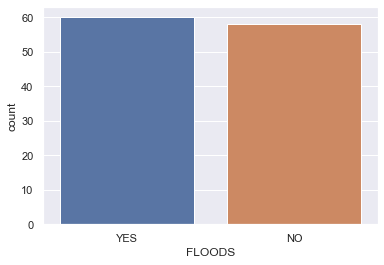

In [11]:
sns.countplot('FLOODS',data=df)
plt.show()

In [12]:
lb = LabelBinarizer()
df['FLOODS']=lb.fit_transform(df['FLOODS'])

In [13]:
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


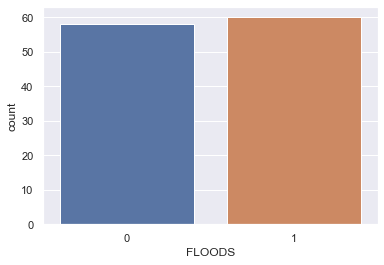

In [14]:
sns.countplot('FLOODS',data=df)
plt.show()

In [15]:
df1 =df[df.columns[:13]]
# Scaling the training data before using PCA
sts=StandardScaler()
 
# Using fit_transform method
sts.fit(df1)
sts_data=sts.transform(df1)
 
# Set the n_components=3 i.e no. of components
pca=PCA(n_components=10)
pca.fit(sts_data)
x=pca.transform(sts_data)
 
# Check the train data dimensions after application of PCA
print(x.shape)

(118, 10)


In [16]:
x

array([[ 1.04489909,  0.36392483,  1.35767284, ...,  0.22689475,
        -0.35359499,  1.26419462],
       [ 1.57683119, -1.07239864, -1.87203862, ..., -0.08198126,
         2.56445679, -0.72169067],
       [ 1.08779069,  0.16160339, -1.1783813 , ...,  0.36024221,
         0.62876077,  0.44296532],
       ...,
       [-2.43534911, -0.18081058,  0.33539947, ..., -0.42416006,
        -0.2690949 , -0.68433609],
       [-2.72799846, -0.99994911, -1.11020213, ...,  0.21438705,
        -0.79346913, -0.19253982],
       [ 5.26694247, -3.02196122, -0.22384262, ..., -1.8426533 ,
        -1.96389285,  1.84185709]])

In [17]:
y = df['FLOODS']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

In [19]:
# Building the model
clf = LogisticRegression()
#clf = svm.SVC(kernel='linear')---> 94.44 %

In [20]:
# Fitting the data to the model for training
clf.fit(x_train,y_train) 

LogisticRegression()

In [21]:
x_pred = clf.predict(x_train )

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
# Display Training Accuracy
print(accuracy_score(y_train,x_pred))

1.0


In [24]:
y_pred = clf.predict(x_test)

In [25]:
# Display Testing accuracy
print(accuracy_score(y_test,y_pred))

0.9722222222222222


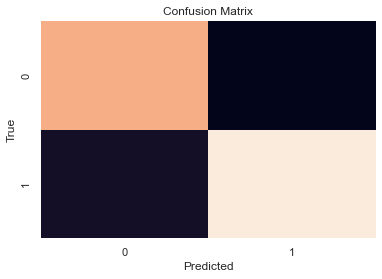

In [26]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [27]:
import joblib
from joblib import Parallel, delayed
joblib.dump(clf,'LogRegr.pkl')

['LogRegr.pkl']

In [28]:
lreg = joblib.load('LogRegr.pkl') # Loading the saved model in pickle(pkl) format

In [29]:
lreg.predict(x_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [30]:
clf.predict(x_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0])